<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [432]:
import pandas as pd

In [433]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [377]:
df_train.sample(n=30)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

## Выводы о случайных 30 наблюдениях
Можно заметить то, как зависит цена продажи от других переменных:
- машины с transmission = 'Automatic' как правило стоят сильно больше
- машина одной и той же марки, но с более поздним годом выпуска, меньшим пробегом, большим значением max_power и torque стоит больше. Но мы не можем сделать вывод о том, что именно из перечисленных факторов дает наибольший эффект на стоимость

In [7]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

## Выводы о первых пяти наблюдениях

- дороже всего стоит машина 2017 года, меньше всего 2007. Следовательно, есть некоторая корреляция между годом и стоимостью
- машина одной и той же марки Honda City, но с разницей в возрасте в 8 лет имеет разницу в цене в 3,6 раза. Но помимо года, у новой машины меньше пробег, отличается тип топлива, и выше величина torque. Поэтому как и в прошлый раз непонятно, что именно оказывает такое влияние на цену, а что является случайностью и по каким переменным мы можем делать выводы. 

In [8]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

## Выводы о последних 5 наблюдениях

- самая дешевая машина имеет следующий признаки: самый старый год выпуска, Second Owner, наименьший engine, max_power и torque
- самая дорогая машина имеет следующие признаки: самый поздний год выпуска, First Owner, наибольший engine, max_power и torque

In [434]:
print("Пропуски в train:", df_train.columns[df_train.isna().any()].tolist())
print("Пропуски в train:", df_test.columns[df_test.isna().any()].tolist())

Пропуски в train: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Пропуски в train: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [435]:
df_train[df_train.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
6880      12000  Diesel  Individual       Manual   First Owner  20.37 kmpl   
6881      32000  Diesel  Individual       Manual   First Owner  28.09 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
326   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
...       ...         ...                  ...    ...  
6880  1461 CC  108.45 bhp       240Nm@ 1750rpm    5.0  
6881  1248 CC   88.50 bhp       200Nm@ 1750rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[985 rows x 13 columns]

Метод duplicated без использования дополнительных параметров указывает только на явные дубликаты, когда совпадают все значения в строках. Если нужно удалить дубликаты только по конкретным переменным, то нужно использовать subset. Или в случае необходимости удаления всех дубликатов, нужно использовать keep = false. Разумность спользования метода зависит от конкретной задачи

In [436]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_test, title="Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00, 11.37it/s]


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

#### Нам целесообразнее для начала сделать задание 3, где мы избавляемся от единиц измерения в столбцах max_power, mileage и engine. А затем уже заполнять пропуски медианными значениями. Заполнять пропуски для поля torque нет смысла, так как в 3 задании мы его все равно дропаем

Пропуски есть в столбцах ['mileage', 'engine', 'max_power', 'torque', 'seats']

In [445]:
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())
df_test['mileage'] = df_test['mileage'].fillna(df_test['mileage'].median())
df_test['engine'] = df_test['engine'].fillna(df_test['engine'].median())
df_test['max_power'] = df_test['max_power'].fillna(df_test['max_power'].median())
df_test['seats'] = df_test['seats'].fillna(df_test['seats'].median())

/var/folders/9q/4jv1370j21d6v7xgn0fy5cfr0000gn/T/ipykernel_29724/3546964773.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())


In [446]:
print("Пропуски в train:", df_train.columns[df_train.isna().any()].tolist())
print("Пропуски в train:", df_test.columns[df_test.isna().any()].tolist())

Пропуски в train: []
Пропуски в train: []


#### Мы убрали все пропуски

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)

In [447]:
df_train_analysis = df_train.drop(columns = ['selling_price'])
df_test_analysis = df_test.drop(columns = ['selling_price'])

#### Дубликаты без таргета - 1799 штук для трэйна и 109 для теста

In [448]:
df_train_analysis[df_train_analysis.duplicated(keep=False)]

name  year km_driven    fuel  \
22                     Maruti Baleno Delta 1.2  2016     45000  Petrol   
26                 Maruti Omni E MPI STD BS IV  2018     25000  Petrol   
27             Maruti Vitara Brezza LDi Option  2017     70000  Diesel   
28                          Fiat Palio 1.2 ELX  2003     50000  Petrol   
29                   Maruti Omni 8 Seater BSIV  2012     35000  Petrol   
...                                        ...   ...       ...     ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018     24000  Diesel   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018     24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015     50000  Diesel   
6997                           Tata Indigo CR4  2013     25000  Diesel   
6998                           Tata Indigo CR4  2013     25000  Diesel   

     seller_type transmission         owner  mileage  engine  max_power  seats  
22    Individual       Manual   First Owner    21.40  1197.0      83.10    5.0  
26    Individual       Manual   First Owner    16.80   796.0      34.20    8.0  
27    Individual       Manual   First Owner    24.30  1248.0      88.50    5.0  
28    Individual       Manual  Second Owner    19.30  1248.0      82.00    5.0  
29    Individual       Manual  Second Owner    14.00   796.0      35.00    5.0  
...          ...          ...           ...      ...     ...        ...    ...  
6981  Individual       Manual   First Owner    24.40  1498.0      98.63    5.0  
6984  Individual       Manual   First Owner    24.40  1498.0      98.63    5.0  
6989  Individual       Manual   First Owner    26.59  1248.0      74.00    5.0  
6997  Individual       Manual   First Owner    23.57  1396.0      70.00    5.0  
6998  Individual       Manual   First Owner    23.57  1396.0      70.00    5.0  

[1799 rows x 11 columns]

In [449]:
df_test_analysis[df_test_analysis.duplicated(keep=False)]

name  year  km_driven    fuel  \
0             Mahindra Xylo E4 BS IV  2010     168000  Diesel   
11                     Lexus ES 300h  2019      20000  Petrol   
39   Skoda Rapid 1.6 MPI AT Elegance  2016      11000  Petrol   
56                   Maruti Ritz VXi  2012      40000  Petrol   
58            Hyundai i20 Sportz 1.2  2012     120000  Petrol   
..                               ...   ...        ...     ...   
934  Mercedes-Benz S-Class S 350 CDI  2017      37000  Diesel   
936       BMW X4 M Sport X xDrive20d  2019       8500  Diesel   
949          Toyota Camry 2.5 Hybrid  2016      68089  Petrol   
971      Maruti Ertiga SHVS ZDI Plus  2017      50000  Diesel   
984                  Maruti Ritz VDi  2012      70000  Diesel   

          seller_type transmission        owner  mileage  engine  max_power  \
0          Individual       Manual  First Owner    14.00  2498.0     112.00   
11             Dealer    Automatic  First Owner    22.37  2487.0     214.56   
39             Dealer    Automatic  First Owner    14.30  1598.0     103.50   
56         Individual       Manual  First Owner    18.50  1197.0      85.80   
58         Individual       Manual  First Owner    18.50  1197.0      82.85   
..                ...          ...          ...      ...     ...        ...   
934            Dealer    Automatic  First Owner    13.50  2987.0     254.79   
936            Dealer    Automatic  First Owner    16.78  1995.0     190.00   
949  Trustmark Dealer    Automatic  First Owner    19.16  2494.0     157.70   
971        Individual       Manual  First Owner    24.52  1248.0      88.50   
984        Individual       Manual  First Owner    23.20  1248.0      73.94   

     seats  
0      7.0  
11     5.0  
39     5.0  
56     5.0  
58     5.0  
..     ...  
934    5.0  
936    5.0  
949    5.0  
971    7.0  
984    5.0  

[109 rows x 11 columns]

In [450]:
df_train_analysis = df_train_analysis.drop_duplicates(keep='first')
df_test_analysis = df_test_analysis.drop_duplicates(keep='first')

In [451]:
df_train_analysis['selling_price'] = df_train.loc[df_train_analysis.index, 'selling_price']
df_test_analysis['selling_price'] = df_test.loc[df_test_analysis.index, 'selling_price']
df_train = df_train_analysis.reset_index(drop=True)
df_test = df_test_analysis.reset_index(drop=True)

In [452]:
df_train

name  year km_driven    fuel seller_type  \
0                Maruti Swift Dzire VDI  2014    145500  Diesel  Individual   
1          Skoda Rapid 1.5 TDI Ambition  2014    120000  Diesel  Individual   
2             Hyundai i20 Sportz Diesel  2010    127000  Diesel  Individual   
3                Maruti Swift VXI BSIII  2007    120000  Petrol  Individual   
4         Hyundai Xcent 1.2 VTVT E Plus  2017     45000  Petrol  Individual   
...                                 ...   ...       ...     ...         ...   
5835            Hyundai Santro Xing GLS  2008    191000  Petrol  Individual   
5836  Maruti Wagon R VXI BS IV with ABS  2013     50000  Petrol  Individual   
5837                  Hyundai i20 Magna  2013    110000  Petrol  Individual   
5838              Hyundai Verna CRDi SX  2007    119000  Diesel  Individual   
5839             Maruti Swift Dzire ZDi  2009    120000  Diesel  Individual   

     transmission                 owner  mileage  engine  max_power  seats  \
0          Manual           First Owner    23.40  1248.0      74.00    5.0   
1          Manual          Second Owner    21.14  1498.0     103.52    5.0   
2          Manual           First Owner    23.00  1396.0      90.00    5.0   
3          Manual           First Owner    16.10  1298.0      88.20    5.0   
4          Manual           First Owner    20.14  1197.0      81.86    5.0   
...           ...                   ...      ...     ...        ...    ...   
5835       Manual           First Owner    17.92  1086.0      62.10    5.0   
5836       Manual          Second Owner    18.90   998.0      67.10    5.0   
5837       Manual           First Owner    18.50  1197.0      82.85    5.0   
5838       Manual  Fourth & Above Owner    16.80  1493.0     110.00    5.0   
5839       Manual           First Owner    19.30  1248.0      73.90    5.0   

     selling_price  
0           450000  
1           370000  
2           225000  
3           130000  
4           440000  
...            ...  
5835        120000  
5836        260000  
5837        320000  
5838        135000  
5839        382000  

[5840 rows x 12 columns]

In [453]:
df_test

name  year  km_driven    fuel  \
0                    Mahindra Xylo E4 BS IV  2010     168000  Diesel   
1                Tata Nexon 1.5 Revotorq XE  2017      25000  Diesel   
2                      Honda Civic 1.8 S AT  2007     218463  Petrol   
3                      Honda City i DTEC VX  2015     173000  Diesel   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011      70000  Petrol   
..                                      ...   ...        ...     ...   
926                  Hyundai i10 Magna 1.1L  2008     100000  Petrol   
927        Hyundai i20 2015-2017 Sportz 1.2  2017      50000  Petrol   
928                  Hyundai i20 Era Diesel  2009      40000  Diesel   
929                        Hyundai i10 Asta  2012      25000  Petrol   
930                    Honda City i DTec SV  2016     110000  Diesel   

    seller_type transmission         owner  mileage  engine  max_power  seats  \
0    Individual       Manual   First Owner    14.00  2498.0     112.00    7.0   
1    Individual       Manual   First Owner    21.50  1497.0     108.50    5.0   
2    Individual    Automatic   First Owner    12.90  1799.0     130.00    5.0   
3    Individual       Manual   First Owner    25.10  1498.0      98.60    5.0   
4    Individual       Manual  Second Owner    16.50  1172.0      65.00    5.0   
..          ...          ...           ...      ...     ...        ...    ...   
926  Individual       Manual  Second Owner    19.81  1086.0      68.05    5.0   
927  Individual       Manual  Second Owner    18.60  1197.0      81.83    5.0   
928  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0   
929  Individual       Manual   First Owner    20.36  1197.0      78.90    5.0   
930  Individual       Manual   First Owner    26.00  1498.0      98.60    5.0   

     selling_price  
0           229999  
1           665000  
2           175000  
3           635000  
4           130000  
..             ...  
926         250000  
927         440000  
928         340000  
929         350000  
930         700000  

[931 rows x 12 columns]

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

#### Сделав предварительный анализ я заметила, что сразу же заменить на float не получится, так как в столбце max_power есть строка 4217 с некорректным форматом. То есть убрав bhp мы получаем пустую строку, которую нельзя форматировать во float. По этой причине я для начала заменю значение в этой строке на медианное, а уже затем преобразую во float

In [437]:
df_train['mileage'] = df_train['mileage'].str.replace("kmpl", '').str.replace("km/kg", '')
df_train['engine'] = df_train['engine'].str.replace("CC", '')
df_train['max_power'] = df_train['max_power'].str.strip().str.replace("bhp", '').replace("", None)
df_test['mileage'] = df_test['mileage'].str.replace("kmpl", '').str.replace("km/kg", '')
df_test['engine'] = df_test['engine'].str.replace("CC", '')
df_test['max_power'] = df_test['max_power'].str.strip().str.replace("bhp", '').replace("", None)

In [438]:
bad_row = df_train.loc[4217]

In [439]:
df_train.drop(index = [4217], inplace=True)

In [440]:
df_train['max_power'] = df_train['max_power'].astype(float)
max_power_median = df_train['max_power'].median()
max_power_median

np.float64(82.0)

In [441]:
bad_row['max_power'] = max_power_median

/var/folders/9q/4jv1370j21d6v7xgn0fy5cfr0000gn/T/ipykernel_29724/1961380387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_row['max_power'] = max_power_median


In [442]:
df_train = pd.concat([df_train, pd.DataFrame(bad_row).T], axis=0).sort_index()

In [443]:
df_train = df_train.drop(columns='torque')
df_test = df_test.drop(columns='torque')

In [444]:
df_train['max_power'] = df_train['max_power'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)
df_train['mileage'] = df_train['mileage'].astype(float)
df_test['mileage'] = df_test['mileage'].astype(float)
df_train['engine'] = df_train['engine'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [454]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

##### До каких-либо преобразований, на сырых данных.

In [409]:
df_train.describe(include=['number'])

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [410]:
df_test.describe(include=['number'])

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [411]:
df_train.describe(include=['object', 'category'])

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [412]:
df_test.describe(include=['object', 'category'])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

#### После заполнения пропусков

In [455]:
df_train['year'] = df_train['year'].astype(int)
df_train['selling_price'] = df_train['selling_price'].astype(int)
df_train['km_driven'] = df_train['km_driven'].astype(int)

In [456]:
df_train.describe(include=['number'])

year     km_driven      mileage       engine    max_power  \
count  5840.000000  5.840000e+03  5840.000000  5840.000000  5840.000000   
mean   2013.428425  7.395224e+04    19.428611  1429.448973    87.910782   
std       4.095622  6.007114e+04     3.986026   485.662834    31.639585   
min    1983.000000  1.000000e+00     0.000000   624.000000     0.000000   
25%    2011.000000  3.900000e+04    16.950000  1197.000000    68.000000   
50%    2014.000000  7.000000e+04    19.300000  1248.000000    81.860000   
75%    2017.000000  1.000000e+05    22.300000  1498.000000    99.000000   
max    2020.000000  2.360457e+06    42.000000  3604.000000   400.000000   

             seats  selling_price  
count  5840.000000   5.840000e+03  
mean      5.426712   5.229601e+05  
std       0.982344   5.354320e+05  
min       2.000000   2.999900e+04  
25%       5.000000   2.500000e+05  
50%       5.000000   4.050000e+05  
75%       5.000000   6.400000e+05  
max      14.000000   1.000000e+07

In [457]:
df_test.describe(include=['number'])

year      km_driven     mileage       engine   max_power  \
count   931.000000     931.000000  931.000000   931.000000  931.000000   
mean   2013.506982   72786.747583   19.378464  1435.484425   88.587143   
std       4.043408   48823.924040    3.994493   515.908793   32.711134   
min    1995.000000    1303.000000    0.000000   624.000000   34.200000   
25%    2011.000000   39000.000000   16.500000  1196.500000   68.050000   
50%    2014.000000   65000.000000   19.330000  1248.000000   82.850000   
75%    2017.000000  100000.000000   22.320000  1498.000000  100.000000   
max    2020.000000  375000.000000   32.260000  3604.000000  280.000000   

            seats  selling_price  
count  931.000000   9.310000e+02  
mean     5.409237   5.501182e+05  
std      0.924622   5.987156e+05  
min      4.000000   3.100000e+04  
25%      5.000000   2.500000e+05  
50%      5.000000   4.200000e+05  
75%      5.000000   6.500000e+05  
max      9.000000   6.000000e+06

In [458]:
df_train.describe(include=['object', 'category'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [459]:
df_test.describe(include=['object', 'category'])

name    fuel seller_type transmission        owner
count                   931     931         931          931          931
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     14     498         813          839          562

- средний год автомобиля 2013
- самая популярная марка автомобиля в train Maruti Swift Dzire VDI, в test Maruti Alto 800 LXI
- самый популярный тип топлива - Diesel
- самый популярный тип продавца - Individual
- чаще всего продает машину первый владелец
- среднее количество посадочных мест 5

In [ ]:
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

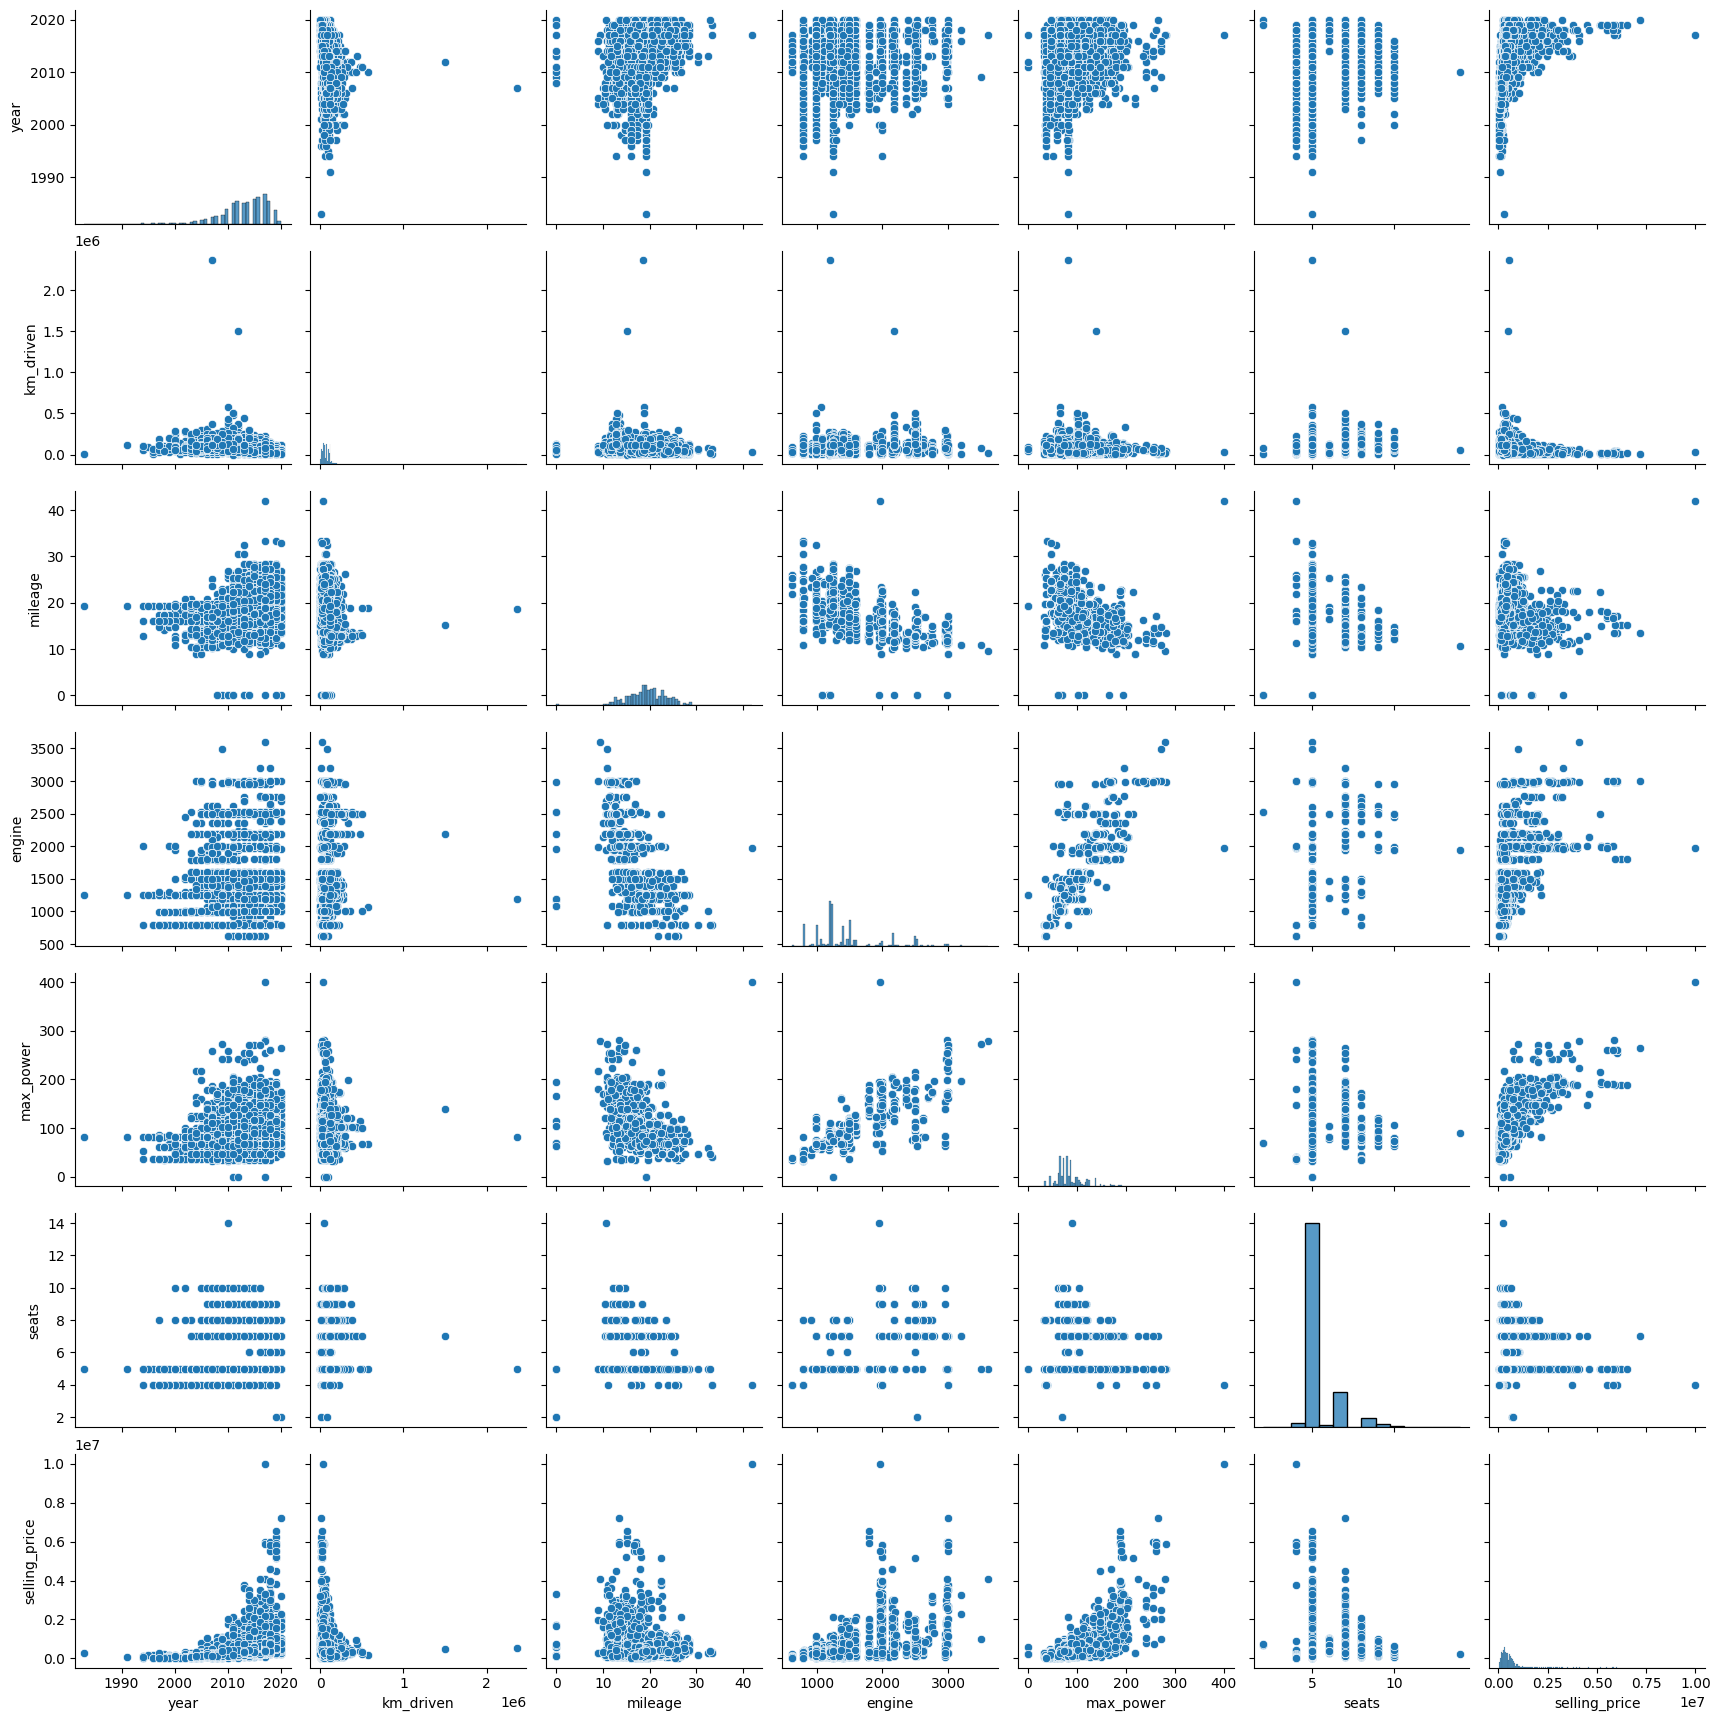

In [ ]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
sns.pairplot(df_train)
plt.show()

- Можно ли предположить на основе распределений связь признаков с целевой переменной?

Year: чем выше цена, тем в среднем новее год автомобиля

Km_driven: чем выше цена, тем в среднем меньше пробег

Mileage: нет такой четкой корреляции как в предыдущих пунктах. Но как правило с увеличением цены уменьшается дисперсия переменной

Engine: тоже нет четкой корреляции, но в среднем наблюдается рост engine с увеличением цены

Max_power: много выбросов, где при низкой цене высокая power. Но как правило наблюдается положительная корреляция между ценой и max_power

Seats: наивысшая цена у машин с меньшим количеством мест. Но возможно это объясняется тем, что в датасете в принципе мало машин с большим количеством мест


- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

- с увеличением года растет показатель engine и max_power

- с уменьшением mileage увеличивается engine и max_power

- положительная корреляция между max_power и engine

- с увеличением количества мест как правило сокращается max_power

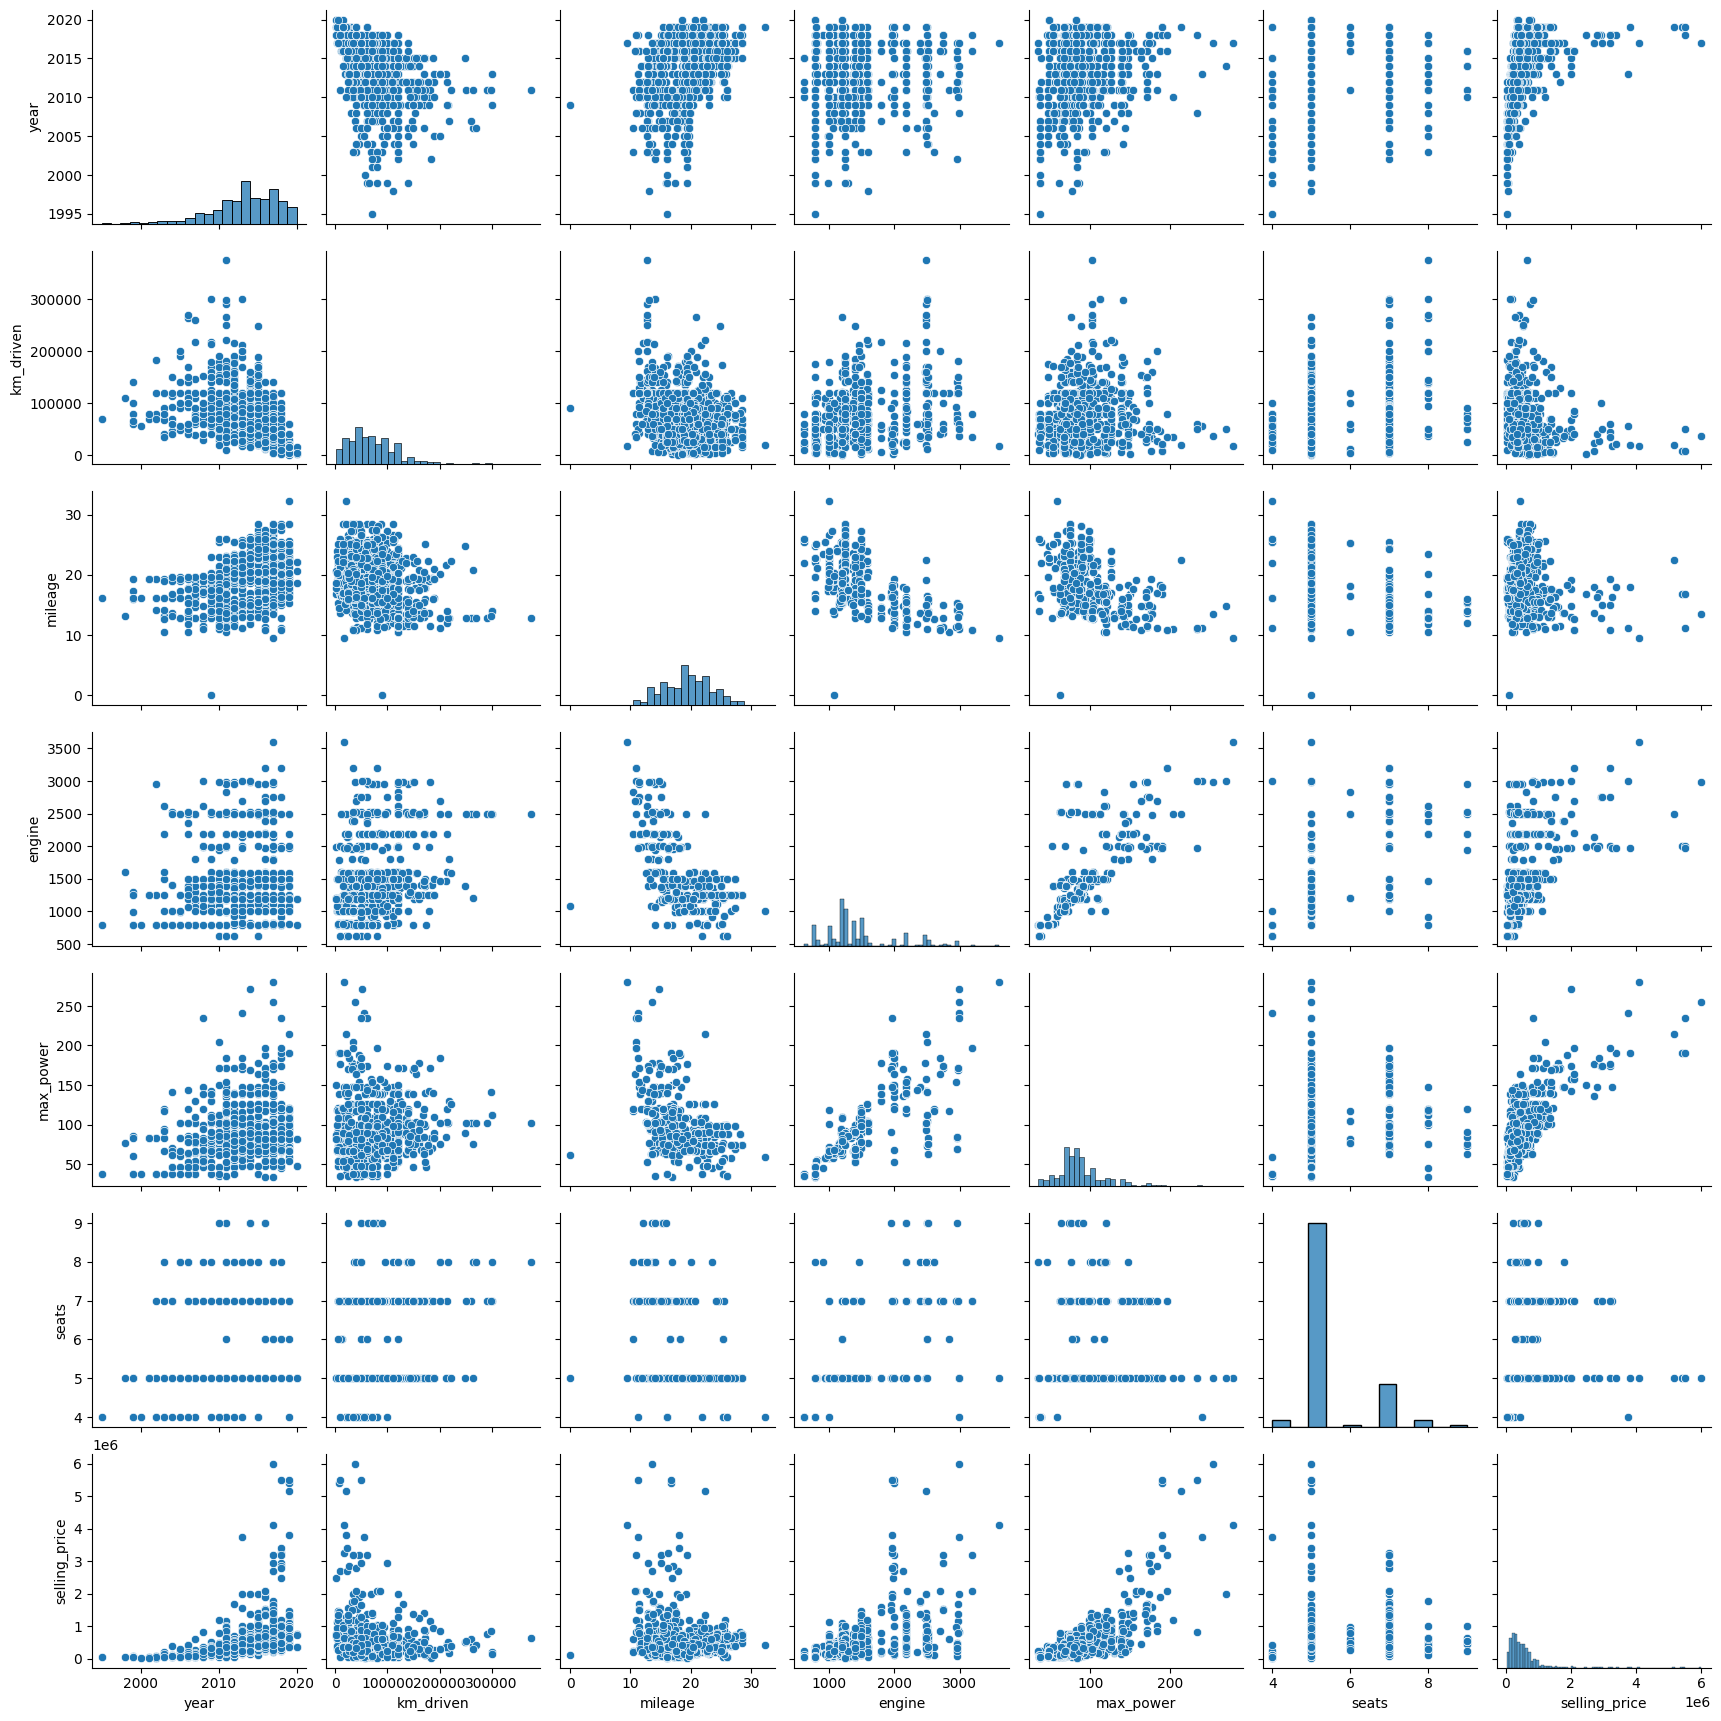

In [461]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
sns.pairplot(df_test)
plt.show()

#### Распределения похожи!!!

`Your answer here`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [468]:
correlations = df_train.select_dtypes('number').corr()
correlations

year  km_driven   mileage    engine  max_power     seats  \
year           1.000000  -0.368966  0.342172  0.002819   0.156648  0.041178   
km_driven     -0.368966   1.000000 -0.182245  0.229766   0.024630  0.192328   
mileage        0.342172  -0.182245  1.000000 -0.572677  -0.373271 -0.450810   
engine         0.002819   0.229766 -0.572677  1.000000   0.681082  0.652172   
max_power      0.156648   0.024630 -0.373271  0.681082   1.000000  0.244060   
seats          0.041178   0.192328 -0.450810  0.652172   0.244060  1.000000   
selling_price  0.427279  -0.164828 -0.104458  0.447672   0.692754  0.149953   

               selling_price  
year                0.427279  
km_driven          -0.164828  
mileage            -0.104458  
engine              0.447672  
max_power           0.692754  
seats               0.149953  
selling_price       1.000000

<Axes: >

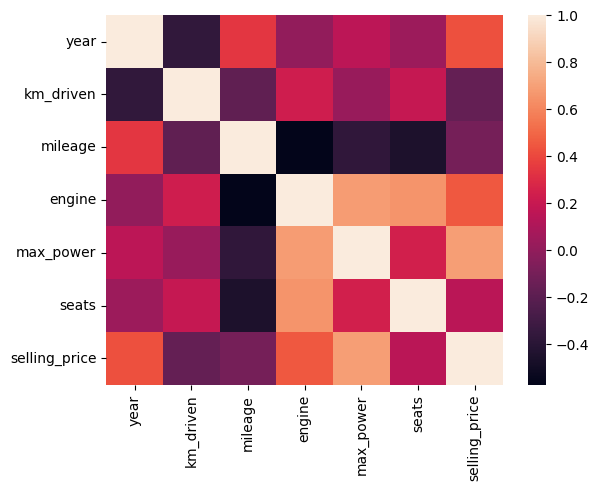

In [467]:
sns.heatmap(correlations)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- наименее скоррелированы переменные engine и year

- высокая корреляция между max_power и engine, seats и engine, max_power и selling_proce

- да, правильно. Так как корреляция между годом и пробегам в километрах -0.368966

`Your answer here`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

Мы еще не рисовали распределения категориальных переменных, давайте сделаем это

In [ ]:
df_train.select_dtypes('object', 'category')

name    fuel seller_type transmission  \
0                Maruti Swift Dzire VDI  Diesel  Individual       Manual   
1          Skoda Rapid 1.5 TDI Ambition  Diesel  Individual       Manual   
2             Hyundai i20 Sportz Diesel  Diesel  Individual       Manual   
3                Maruti Swift VXI BSIII  Petrol  Individual       Manual   
4         Hyundai Xcent 1.2 VTVT E Plus  Petrol  Individual       Manual   
...                                 ...     ...         ...          ...   
5835            Hyundai Santro Xing GLS  Petrol  Individual       Manual   
5836  Maruti Wagon R VXI BS IV with ABS  Petrol  Individual       Manual   
5837                  Hyundai i20 Magna  Petrol  Individual       Manual   
5838              Hyundai Verna CRDi SX  Diesel  Individual       Manual   
5839             Maruti Swift Dzire ZDi  Diesel  Individual       Manual   

                     owner  
0              First Owner  
1             Second Owner  
2              First Owner  
3              First Owner  
4              First Owner  
...                    ...  
5835           First Owner  
5836          Second Owner  
5837           First Owner  
5838  Fourth & Above Owner  
5839           First Owner  

[5840 rows x 5 columns]

У нас 1924 уникальных значения для поля name, строить распрделение для них всех трудозатратно. Давайте отразим на графике топ 20 категорий

In [475]:
df_train['name'].nunique()

1924

Самая популярная марка ошибки - Maruti Swift Dzire VDI  

<Axes: xlabel='name', ylabel='count'>

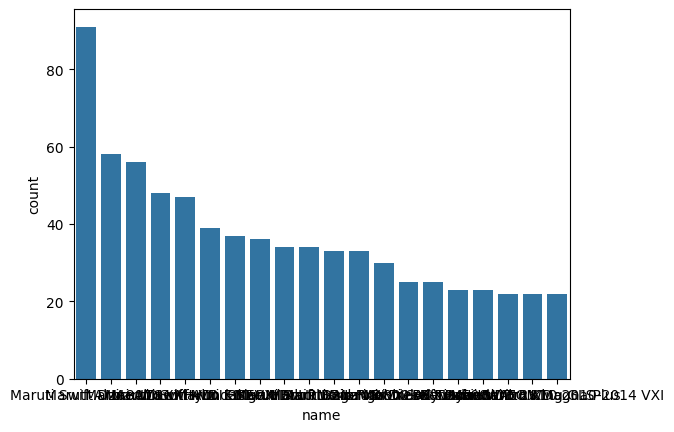

In [488]:
top_20_name = df_train['name'].value_counts().head(20)
sns.barplot(top_20_name)

<Axes: ylabel='fuel'>

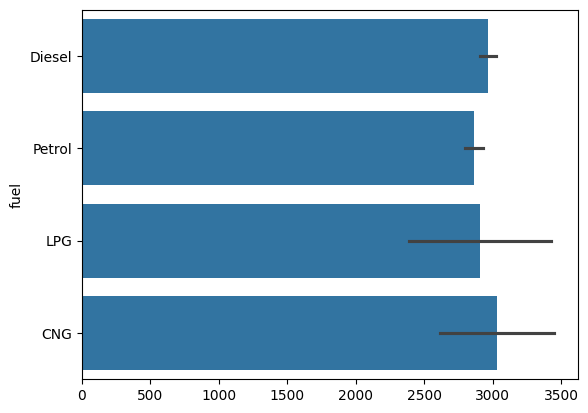

In [ ]:
sns.barplot(df_train['fuel'])

<Axes: ylabel='seller_type'>

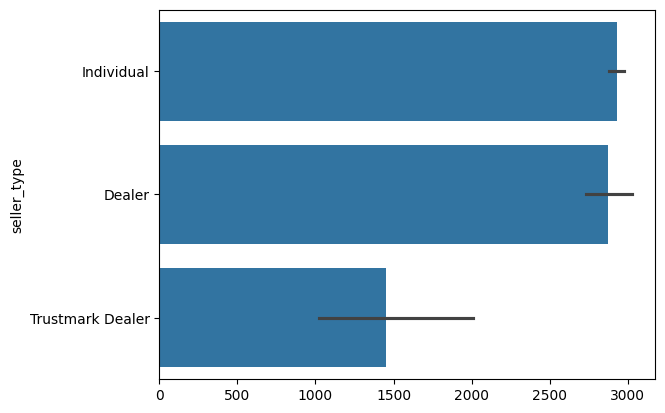

In [495]:
sns.barplot(df_train['seller_type'])

<Axes: ylabel='transmission'>

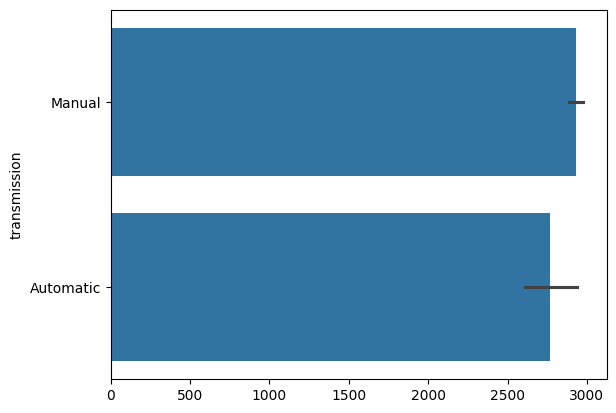

In [496]:
sns.barplot(df_train['transmission'])

<Axes: ylabel='owner'>

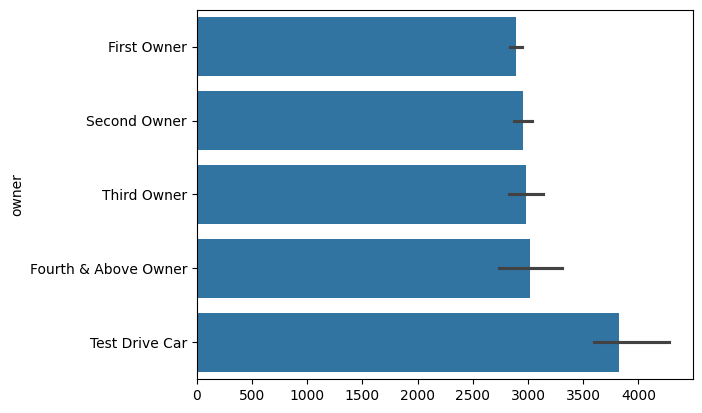

In [497]:
sns.barplot(df_train['owner'])

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [590]:
df_train_new = df_train.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'])
df_test_new = df_test.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [591]:
y_train = df_train_new['selling_price']
X_train = df_train_new.drop(columns=['selling_price'])

In [ ]:
# опишите выбранные вещественные признаки

In [592]:
y_test = df_test_new['selling_price']
X_test = df_test_new.drop(columns=['selling_price'])

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [593]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train.astype(float), y_train)
y_pred_linear = model.predict(X_test)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [594]:
mse = MSE(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"MSE: {mse:.4f}")
print(f"R² в процентах: {r2 * 100:.2f}%")

MSE: 137676237761.9257
R² в процентах: 61.55%


#### Мы получили сильно большой MSE, что говорит о проблемах в модели
#### Модель объясняет 61.55% дисперсии целевой переменной. Что допустимо, но все еще далеко от 100%

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [595]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled.astype(float), y_train)
y_pred_linear_standared = model.predict(X_test_scaled)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [596]:
mse = MSE(y_test, y_pred_linear_standared)
r2 = r2_score(y_test, y_pred_linear_standared)

print(f"MSE: {mse:.4f}")
print(f"R² в процентах: {r2 * 100:.2f}%")

MSE: 137676237761.9220
R² в процентах: 61.55%


#### R2 остался на прежнем уровне, MSE совсем незначительно упал

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [597]:
model.coef_

array([152843.26235773, -44148.04751104,  28781.08659475,  61176.85714999,
       322779.70323584, -23220.5702262 ])

In [598]:
df_train_new

year  km_driven  mileage  engine  max_power  seats  selling_price
0     2014     145500    23.40    1248      74.00      5         450000
1     2014     120000    21.14    1498     103.52      5         370000
2     2010     127000    23.00    1396      90.00      5         225000
3     2007     120000    16.10    1298      88.20      5         130000
4     2017      45000    20.14    1197      81.86      5         440000
...    ...        ...      ...     ...        ...    ...            ...
5835  2008     191000    17.92    1086      62.10      5         120000
5836  2013      50000    18.90     998      67.10      5         260000
5837  2013     110000    18.50    1197      82.85      5         320000
5838  2007     119000    16.80    1493     110.00      5         135000
5839  2009     120000    19.30    1248      73.90      5         382000

[5840 rows x 7 columns]

Самым информативным признаком в предсказании цены оказался seats

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [599]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=10)
model.fit(X_train_scaled, y_train)
y_pred_Lasso = model.predict(X_test_scaled)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [600]:
mse = MSE(y_test, y_pred_Lasso)
r2 = r2_score(y_test, y_pred_Lasso)

print(f"MSE: {mse:.4f}")
print(f"R² в процентах: {r2 * 100:.2f}%")

MSE: 137677865541.4090
R² в процентах: 61.55%


In [601]:
model.coef_

array([152841.16229322, -44136.83373387,  28762.59314019,  61128.49193295,
       322788.69169988, -23191.62877764])

Все коэффициенты значимы, ничего не занулилось. 

Причины:
- признаки действительно важны
- надо было выбрать больший alpha

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [602]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {
    'alpha': [0, 5, 10, 15, 20],
    'selection' : ['cyclic', 'random']
}
model = Lasso()
reg_cv = GridSearchCV(model, parameters, cv=10)
reg_cv.fit(X_train_scaled, y_train)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0, 5, 10, 15, 20],
                         'selection': ['cyclic', 'random']})

In [603]:
reg_cv.best_estimator_

Lasso(alpha=20, selection='random')

In [604]:
y_pred_GridSearchCV_Lasso = reg_cv.predict(X_test)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [606]:
r2 = r2_score(y_test, y_pred_GridSearchCV_Lasso)
print(f"R² в процентах: {r2 * 100:.2f}%")

R² в процентах: -3452096909.09%


Грид-серчу пршилось обучать 10 моделей, коэффициент регуляризации 20

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [607]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
parameters = {
    'alpha': [0, 5, 10, 15, 20],
    'selection' : ['cyclic', 'random'],
    'l1_ratio' : [0, 0.2, 0.4, 0.6, 0.8, 1]
}
model = ElasticNet()
reg_cv = GridSearchCV(model, parameters, cv=10)
reg_cv.fit(X_train_scaled, y_train)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0, 5, 10, 15, 20],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                         'selection': ['cyclic', 'random']})

In [608]:
reg_cv.best_estimator_

ElasticNet(alpha=20, l1_ratio=1, selection='random')

In [609]:
y_pred_ElasticNet = reg_cv.predict(X_test)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [610]:
r2 = r2_score(y_test, y_pred_ElasticNet)
print(f"R² в процентах: {r2 * 100:.2f}%")

R² в процентах: -3452187658.87%


Грид-серчу пршилось обучать 60 моделей, коэффициент регуляризации 20

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [611]:
df_train_all = df_train.drop(columns=['name'])
df_test_all = df_test.drop(columns=['name'])

y_train = df_train_all['selling_price']
X_train = df_train_all.drop(columns=['selling_price'])

y_test = df_test_all['selling_price']
X_test = df_test_all.drop(columns=['selling_price'])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

Заметим и запомним, что последний индекс для трэйна 5839

In [612]:
X_train

year  km_driven    fuel seller_type transmission                 owner  \
0     2014     145500  Diesel  Individual       Manual           First Owner   
1     2014     120000  Diesel  Individual       Manual          Second Owner   
2     2010     127000  Diesel  Individual       Manual           First Owner   
3     2007     120000  Petrol  Individual       Manual           First Owner   
4     2017      45000  Petrol  Individual       Manual           First Owner   
...    ...        ...     ...         ...          ...                   ...   
5835  2008     191000  Petrol  Individual       Manual           First Owner   
5836  2013      50000  Petrol  Individual       Manual          Second Owner   
5837  2013     110000  Petrol  Individual       Manual           First Owner   
5838  2007     119000  Diesel  Individual       Manual  Fourth & Above Owner   
5839  2009     120000  Diesel  Individual       Manual           First Owner   

      mileage  engine  max_power  seats  
0       23.40    1248      74.00      5  
1       21.14    1498     103.52      5  
2       23.00    1396      90.00      5  
3       16.10    1298      88.20      5  
4       20.14    1197      81.86      5  
...       ...     ...        ...    ...  
5835    17.92    1086      62.10      5  
5836    18.90     998      67.10      5  
5837    18.50    1197      82.85      5  
5838    16.80    1493     110.00      5  
5839    19.30    1248      73.90      5  

[5840 rows x 10 columns]

In [613]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

train_and_test =  pd.concat([X_train, X_test], axis=0)
train_and_test = pd.get_dummies(train_and_test, columns=['owner', 'seats', 'fuel', 'seller_type', 'transmission'], drop_first=True, dtype=int)
train_and_test
X_train = train_and_test.iloc[:5840]
X_test = train_and_test.iloc[5840:]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [614]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': [0, 5, 10, 15, 20],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}
model = Ridge()
reg_cv = GridSearchCV(model, parameters, cv=10)
reg_cv.fit(X_train, y_train)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ 

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0, 5, 10, 15, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})

In [615]:
reg_cv.best_estimator_

Ridge(alpha=5, solver='svd')

In [616]:
y_pred_Ridge = reg_cv.predict(X_test)

/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/anastasia/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [617]:
r2 = r2_score(y_test, y_pred_Ridge)
print(f"R² в процентах: {r2 * 100:.2f}%")

R² в процентах: 65.69%


#### Предсказание модели улучшилось на 4%

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [619]:
def business_metric(y_true, y_pred):
    return np.sum(np.abs((y_true-y_pred)/y_true)<0.1)/len(y_true)

print(business_metric(y_test, y_pred_linear))
print(business_metric(y_test, y_pred_linear_standared))
print(business_metric(y_test, y_pred_Lasso))
print(business_metric(y_test, y_pred_GridSearchCV_Lasso))
print(business_metric(y_test, y_pred_ElasticNet))
print(business_metric(y_test, y_pred_Ridge))

0.23523093447905477
0.23523093447905477
0.23523093447905477
0.0
0.0
0.24812030075187969


#### Лучше всего задачу бизнеса решает последняя модель Ridge с применением GridSearchCV

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.